# Before you start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [ ]:
# Import your libraries:

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import pandas as pd


In this lab, we will explore a dataset that describes websites with different features and label them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the dataset from [here](https://drive.google.com/file/d/18LRRR60T-7NbUeZPCSI1crjo8O3LeGhc/view?usp=sharing), place it in the data folder and load it in variable `websites`

In [ ]:
websites = pd.read_csv('../data/website.csv')

websites.head()

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for more exploration. Make sure to comment what you find!

In [ ]:
# Your code here
websites.dtypes


In [ ]:
# Your comment here


# What the dataset looks like?
# What are the data types?

# Answer: Most of the values in the columsn are integers. There are few float values and few objects.

# Which columns contain the features of the websites?

# Answer: The columns that contain the features of the website are "URL",  "URL_length" , "NUMBER_SPECIAL_CHARACTERS ", "CHARSET", and "Server"


# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

# Answer: Not sure. I do not know.


# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# Answer: Not sure. I do not know.

# Resource: https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/


#### Next, evaluate if the columns in this dataset are strongly correlated.

In class, we discussed that we are concerned if our dataset has strongly correlated columns because if this is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [ ]:
# Your code here

corr = websites.corr()

In [ ]:
# Heatmap

plt.figure(figsize=(20,15))

sns.heatmap(corr, annot=True)

In [ ]:
# Your comment here

# APP_PACKETS and REMOTE_APP_PACKETS have a strong collinearity of 0.99
# REMOTE_APP_PACKETS and SOURCE_APP_PACKETS have a strong collinearity of 0.99
# URL LENGTH and NUMBER_SPECIAL_CHARACTERS have a strong collinearity of 0.92


# So, the columns I might need to remove due to high collinearity are NUMBER_SPECIAL_CHARACTERS, SOURCE_APP_PACKETS and REMOTE_APP_PACKETS 
#Paolo:Ok

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [ ]:
# Your code here

# I would like to remove "REMOTE_APP_PACKETS" and "NUMBER_SPECIAL_CHARACTERS" columns as they both have 
# a strong collinearity of more than 90%

websites.drop(["REMOTE_APP_PACKETS","NUMBER_SPECIAL_CHARACTERS"] , inplace=True, axis = 1)



In [ ]:
# Print heatmap again

corr = websites.corr()
plt.figure(figsize=(20,15))

sns.heatmap(corr, annot=True)

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [ ]:
# Your code here
websites.isna().sum()

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [ ]:
# Your code here

# From above we see that "CONTENT_LENGTH" has 812 missing values and the other 2 columsn have only 1 missing value each.

# So, we will drop the column "CONTENT_LENGTH"

websites.drop(["CONTENT_LENGTH"] , inplace=True, axis = 1)

websites.head(30)


In [ ]:
# Your comment here

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [ ]:
# Examine missing values in each column

websites.isna().sum()

# There are 1 missing value each in columns 'SERVER' and 'DNS_QUERY_TIMES'. 
# Since 1 missing value is not very high, we will leave it as is.

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [ ]:
# Your code here

websites['WHOIS_COUNTRY'].unique()


In [ ]:

websites['WHOIS_COUNTRY'].replace({"Cyprus": "CY", "us": "US", "se": "SE", "United Kingdom": "GB", "[u'GB'; u'UK']": "GB"  }, inplace=True)
websites['WHOIS_COUNTRY'].unique()


Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

In [ ]:
# Your code here

plt.figure(figsize=(20,15))

websites['WHOIS_COUNTRY'].value_counts().plot.bar()


#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [ ]:
# Your code here

top_ten_values = websites['WHOIS_COUNTRY'].value_counts().index.tolist()[0:10]

websites['WHOIS_COUNTRY'].loc[~websites['WHOIS_COUNTRY'].isin(top_ten_values)] = "OTHER"
websites['WHOIS_COUNTRY']


# In the above, I used isin to check if the value is in the allowed list, ~ to negate that, and then .loc to modify the series in place
# Reference: https://stackoverflow.com/questions/34866856/how-to-replace-all-values-in-a-pandas-dataframe-not-in-a-list
#Paolo: yes!

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [ ]:
# Your code here

websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis=1, inplace=True)

websites

# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [ ]:
# Your code here
websites.dtypes

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [ ]:
# Your code here
websites.drop('URL', axis=1, inplace=True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [ ]:
# Your code here

websites['CHARSET'].value_counts()

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [ ]:
# Your code here

websites['SERVER'].unique()


![Think Hard](../images/think-hard.jpg)

In [ ]:
# Your comment here

# there seem to be different versions of the same item. For example, there 
# are many values which are related to Apache and nginx.

In [ ]:
# The column "SERVER" has 1 missing value
# Before I work on the "SERVER" column below, I would like to drop missing values from the column

websites['SERVER'].dropna(inplace=True)

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [ ]:
# Your code here

websites['SERVER'].loc[websites['SERVER'].str.contains("Microsoft")] = "Microsoft"
websites['SERVER'].loc[websites['SERVER'].str.contains("Apache")] = "Apache"
websites['SERVER'].loc[websites['SERVER'].str.contains("nginx")] = "nginx"
websites['SERVER'].loc[~websites['SERVER'].str.contains('Microsoft|nginx|Apache')] = "Other"
# ~ is used to negate


websites['SERVER']



In [ ]:
# Count `SERVER` value counts here

websites['SERVER'].value_counts()

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummy values to a new variable `website_dummy`.**

In [ ]:
# Your code here

websites.dtypes

In [ ]:
# The get_dummies() function is used to convert categorical variable into dummy/indicator variables.

website_dummy = pd.get_dummies(websites, columns=['CHARSET', 'SERVER', 'WHOIS_COUNTRY'])



Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [ ]:
# Your code here

website_dummy.head()

In [ ]:
website_dummy.dtypes

# We see that there are no  more categorical values. 

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [ ]:
# To make sure that there are no missing values I am dropping all missing values in the column "Type"

website_dummy.dropna(inplace=True)

In [ ]:
# I will be using the "Type" column from the website_dummy dataframe. 
# The column has the scores for the websites, whether its benign (0) or malicious (1)

# Here the column "Type" is used to TEST and the remaining columns are used to TRAIN the dataframe/



from sklearn.model_selection import train_test_split

y = website_dummy['Type']
X = website_dummy.drop('Type', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#### In this lab, we will try two different models and compare our results.

The first model we will use in this lab is logistic regression. We have previously learned about logistic regression as a classification algorithm. In the cell below, load `LogisticRegression` from scikit-learn and initialize the model.

In [ ]:
# Your code here:

# TRAIN THE  MODEL 

from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

Next, fit the model to our training data. We have already separated our data into 4 parts. Use those in your model.

In [ ]:
# Your code here:

model.fit(X_train, y_train)
#Paolo: ok, you can increase the iteration by adding max_iter=1000
# in LogisticRegression(max_iter=1000) above

finally, import `confusion_matrix` and `accuracy_score` from `sklearn.metrics` and fit our testing data. Assign the fitted data to `y_pred` and print the confusion matrix as well as the accuracy score

In [ ]:
# Your code here:

# TEST THE  MODEL 

from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred})

What are your thoughts on the performance of the model? Write your conclusions below.

In [ ]:
# Your conclusions here:

# By eyeballing the test and predicted in the above table, it looks like the its a highly predictive model. 

# Lets calculate the acuracy score

accuracy_score(y_test, y_pred)

# The accuracy score is 91.29. Therefore the model predicted with an accuracy of 91.29%.
#Paolo: ok, what about the confusion matrix?

#### Our second algorithm is is K-Nearest Neighbors. 

Though is it not required, we will fit a model using the training data and then test the performance of the model using the testing data. Start by loading `KNeighborsClassifier` from scikit-learn and then initializing and fitting the model. We'll start off with a model where k=3.

In [ ]:
# Your code here:

# TRAIN THE MODEL 

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

To test your model, compute the predicted values for the testing sample and print the confusion matrix as well as the accuracy score.

In [ ]:
# Your code here:

# TEST THE MODEL

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

# The accuracy is higher than the linear regression model procedure. It is 92.41% accurate.

#### We'll create another K-Nearest Neighbors model with k=5. 

Initialize and fit the model below and print the confusion matrix and the accuracy score.

In [ ]:
# Your code here:


from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

Did you see an improvement in the confusion matrix when increasing k to 5? Did you see an improvement in the accuracy score? Write your conclusions below.

In [ ]:
# Your conclusions here:

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

# The accuracy is litle higher than k=3. Here the accuracy score is 92.69%.

# Comparing previous confusion matrix output for k=3 and this output for k=5, we that the following:
# The TP - TRUE POSITIVE value has increase from 301 to 303
# The FP - FALSE POSITIVE value has reduced from 8 to 6
# The FN - FALSE NEGATIVE value has increase from 19 to 20
# The TN - TRUE NEGATIVE value has reduced from 30 to 29

HOW TO READ CONFUSION MATRIX:
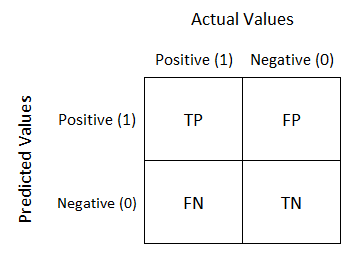


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use logistic regression to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

In [ ]:
# Your code here
from sklearn.preprocessing import RobustScaler 
scaler = RobustScaler() 

In [ ]:

# TRAIN THE MODEL 
X_train_transformed = scaler.fit_transform(X_train)
X_train_transformed


In [ ]:
# TEST THE MODEL

X_test_transformed = scaler.transform(X_test)
X_test_transformed

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
#Paolo: here be careful, the split on train_test_split is random so here X_train X_test are
# different to the ones above, so you are comparing results on different sets.
#Paolo: you should just use the scaled values of the existing tran and test data

In [ ]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = model.predict(X_test)
pd.DataFrame({'test':y_test, 'predicted':y_pred})

In [ ]:
print(confusion_matrix(y_test, y_pred))
print('\n')
print(accuracy_score(y_test, y_pred))

In [ ]:
# Yes, the accuracy score is 93.82 which is higher than the previous model where feature scaling was not performed.